In [6]:
!pip install -q mediapipe


In [1]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt

In [2]:
# Initialize MediaPipe Hands.
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True,max_num_hands=1)
mp_drawing = mp.solutions.drawing_utils

In [3]:
def detect_hand_landmarks(image):
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect hand landmarks.
    results = hands.process(image_rgb)

    # Retrieve the height and width of the input image.
    height, width, _ = image.shape

    landmarks = []

    
    if results.multi_hand_landmarks:
        for i in range(21):
            # Display the found landmarks after converting them into their original scale.
            print(f'{mp_hands.HandLandmark(i).name}:') 
            print(f'x: {results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark(i).value].x }')
            print(f'y: {results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark(i).value].y }')
            print(f'z: {results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark(i).value].z }')

        # Draw landmarks on the image.
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        
        #isko change unnecessarily values convert kr rhe
        for landmark in results.multi_hand_landmarks[0].landmark:
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))

    # Show the output image.
    plt.figure(figsize=[4,4])
    plt.imshow(image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
    plt.show()
    
    return landmarks

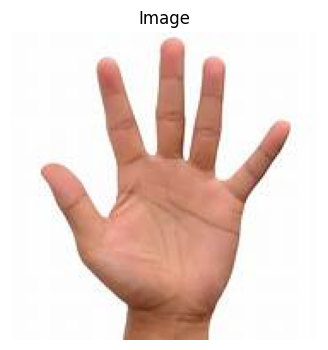

In [4]:
# Read the input image.
image_path='images/img.jpeg'
image = cv2.imread(image_path)
# cv2.imshow('Window', img)
# cv2.waitKey(0)
plt.figure(figsize=[4,4])
plt.imshow(image[:,:,::-1]);plt.title("Image");plt.axis('off');
plt.show()

WRIST:
x: 0.5316107273101807
y: 0.894171953201294
z: 8.750354254516424e-07
THUMB_CMC:
x: 0.3706921935081482
y: 0.8175549507141113
z: -0.06664984673261642
THUMB_MCP:
x: 0.26820865273475647
y: 0.6815970540046692
z: -0.0987096056342125
THUMB_IP:
x: 0.21525335311889648
y: 0.5523750185966492
z: -0.12611162662506104
THUMB_TIP:
x: 0.14740556478500366
y: 0.46024394035339355
z: -0.1531117558479309
INDEX_FINGER_MCP:
x: 0.4114024043083191
y: 0.4740574359893799
z: -0.05471685156226158
INDEX_FINGER_PIP:
x: 0.3668074607849121
y: 0.30921655893325806
z: -0.10545890033245087
INDEX_FINGER_DIP:
x: 0.3410775065422058
y: 0.20409394800662994
z: -0.15078933537006378
INDEX_FINGER_TIP:
x: 0.32189956307411194
y: 0.10882222652435303
z: -0.18683725595474243
MIDDLE_FINGER_MCP:
x: 0.5168827176094055
y: 0.4644396901130676
z: -0.06539244949817657
MIDDLE_FINGER_PIP:
x: 0.5210853815078735
y: 0.276816725730896
z: -0.1101900264620781
MIDDLE_FINGER_DIP:
x: 0.5240432620048523
y: 0.15421706438064575
z: -0.15658004581928253


C:\Users\ishan\AppData\Roaming\Python\Python312\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


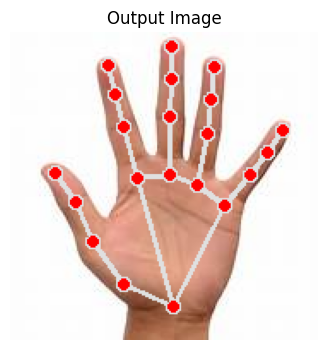

In [5]:
landmarks =detect_hand_landmarks(image)

In [6]:
landmarks

[(95, 160, 0.00015750637658129563),
 (66, 147, -11.996972411870956),
 (48, 122, -17.76772901415825),
 (38, 99, -22.700092792510986),
 (26, 82, -27.560116052627563),
 (74, 85, -9.849033281207085),
 (66, 55, -18.982602059841156),
 (61, 36, -27.14208036661148),
 (57, 19, -33.63070607185364),
 (93, 83, -11.770640909671783),
 (93, 49, -19.834204763174057),
 (94, 27, -28.184408247470856),
 (94, 8, -34.57134872674942),
 (109, 89, -15.455043911933899),
 (115, 59, -26.214972138404846),
 (117, 39, -34.74981218576431),
 (119, 20, -40.67745387554169),
 (125, 101, -20.05663901567459),
 (140, 83, -31.193358600139618),
 (150, 70, -36.969248950481415),
 (159, 57, -40.685516595840454)]